# This EDA was performed as part of my first-week learning to practice structured data exploration and analytical reasoning.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [24]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Some columns such as Age, Cabin, and Embarked contain missing values

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### This provides an overview of numerical features, helping identify skewness, ranges, and potential outliers.

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Observations:

#### Cabin has a large number of missing values and may not be very useful

#### Age has missing values that need to be handled

#### Embarked has very few missing values

In [36]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [37]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [38]:
df.drop(columns=['Cabin'], errors='ignore', inplace=True)


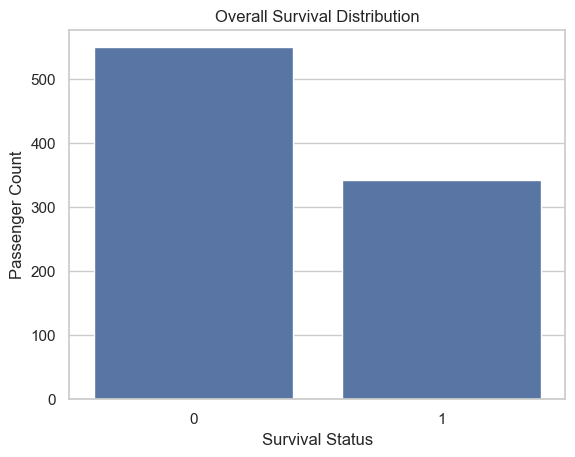

In [39]:
sns.countplot(x='Survived', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Passenger Count')
plt.title('Overall Survival Distribution')
plt.show()

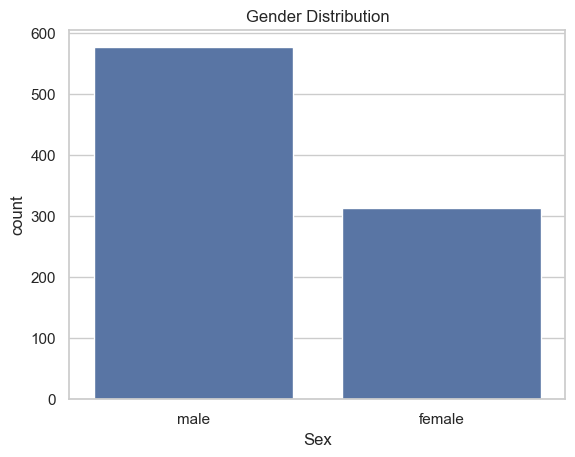

In [40]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

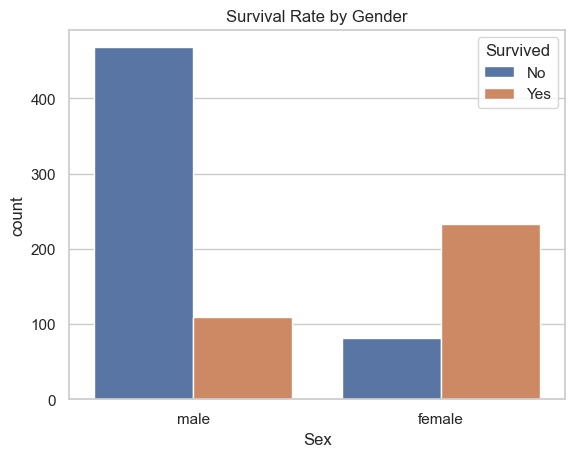

In [41]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

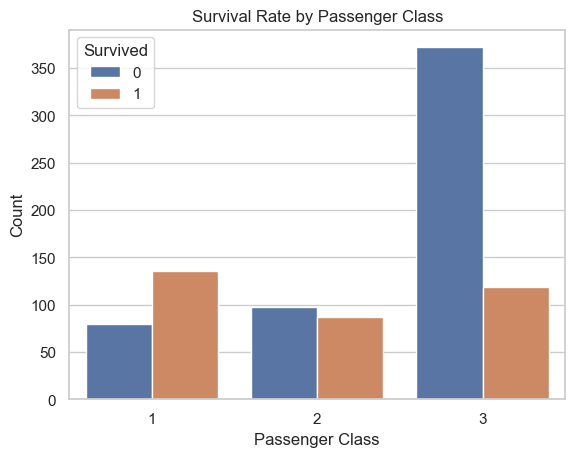

In [42]:
sns.countplot(x='Pclass', hue='Survived', data=df, order=[1,2,3])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

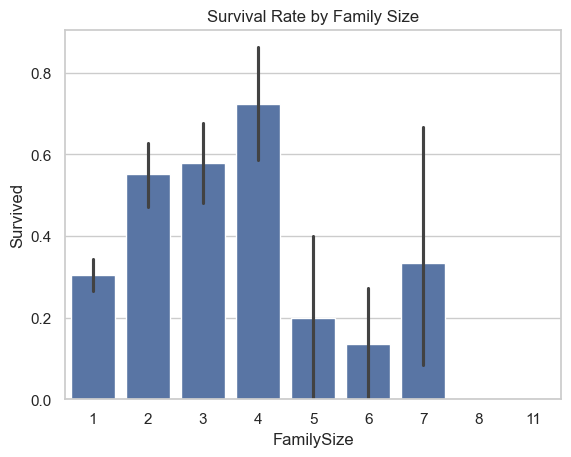

In [43]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

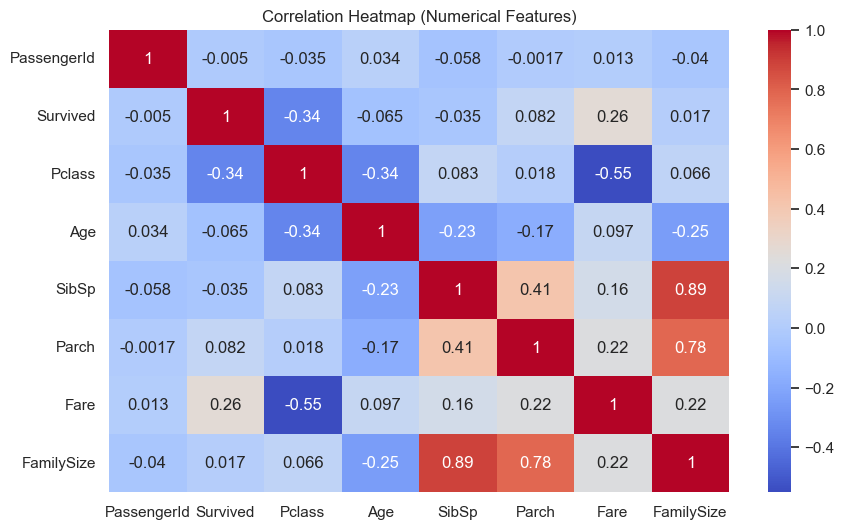

In [44]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


## Short Summary Report

#### This analysis explored the Titanic dataset to understand passenger characteristics and factors related to survival. Missing values in the Age column were handled using the median, while Embarked was filled with the most frequent category. The Cabin column was removed due to excessive missing data.

#### The analysis showed that survival was strongly influenced by gender and passenger class, with female passengers and those in higher classes having better survival outcomes. Creating a family size feature revealed that passengers traveling with small families tended to survive more often. These findings helped build an initial understanding of the dataset and highlighted features useful for further analysis or modeling.